# Part II - (Ford Gobike System Data)
## by (Mahmoud Elsafy)

## Investigation Overview
> In this investigation, I will provide some visuals between some interesting variables to see their impact on other variables such as (Duration of Trips, User Type, Gender of Users, The Age, Trip Time 'Weekday & Day Hours') to answer some of the questions below:
 1-What is the peak time of trips during the day hours?
 2-What are the range and average of riders ages?
 3-What is the percentage for each user type?
 4-Which of user type has the long trip duration?
 5-Which gender has the longest trips duration during the weekdays?
 6-Which is the user type that has the longest duration of trips during the weekdays?
 7-What are the highest and lowest average trip duration for each user type and gender?
## Dataset Overview
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, The dataset contains 17,3920 rows and 17 columns that repersent the bike riders in San Francisco Bay area with the following importaent vaariables:(Trip Duration (minutes), Start Station (Time,Name) and End Stations (Time,Name),User Type ('Subscriber' = Member , 'Customer' = Casual),Member Birth Year and Age,Member Gender).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('gobike_clean.csv')


## 1-What is the peak time of trips during the day hours?

> As we see clearly the usage bikes is down in the weekend days (Sat & Sun), and coming rise up in weekdays (working days).


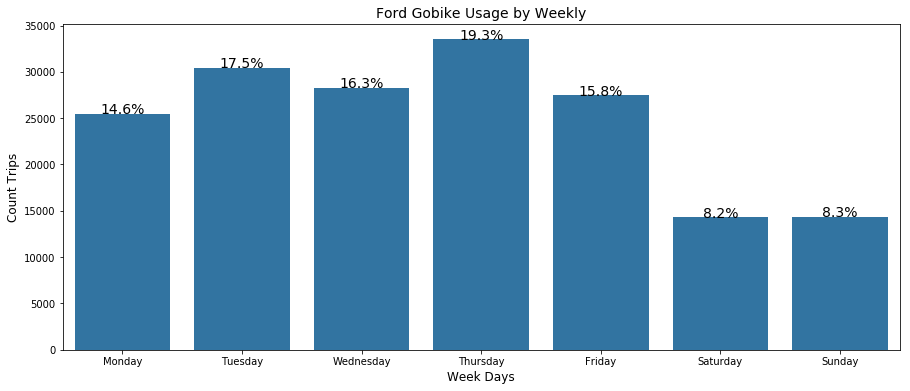

In [3]:
# Review total trips by weekly
plt.figure(figsize=[15,6])
sort_days = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
color = sb.color_palette()[0]
sb.countplot(data=gobike, x='trip_day', color=color,order=sort_days)
plt.xlabel('Week Days', size=12)
plt.title('Ford Gobike Usage by Weekly', size=14)
plt.ylabel('Count Trips', size=12)
day_count = gobike.trip_day.value_counts()
total_trips = day_count.sum()
locs, labels = plt.xticks(size=10)
for loc, label in zip(locs, labels):
    count = day_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_trips)
    plt.text(loc, count+10, pct_string, ha='center', color = 'black', fontsize=14);

## 2-What are the range and average of riders ages?

> As we see here the range of age is between 21 to 60 age, with outliers between 60 to 70 age, and the most common age is between the bike riders 30 to 42 age, that makes sense.

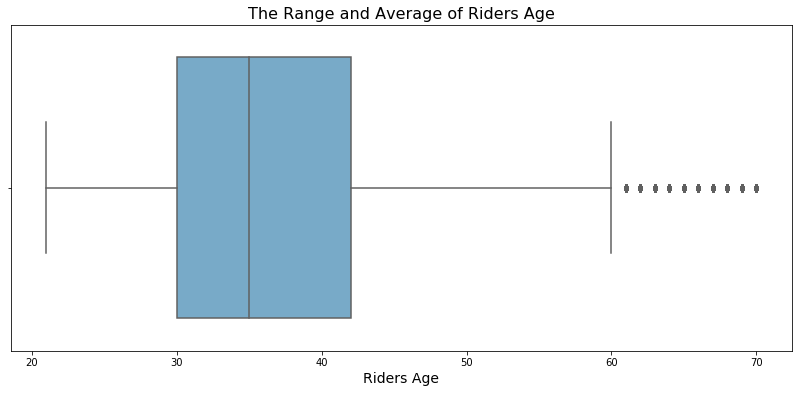

In [4]:
# Review Rider Age
plt.figure(figsize=[14,6])
sb.boxplot(data=gobike,x='age', palette='Blues')
plt.title('The Range and Average of Riders Age', size=16)
plt.xlabel('Riders Age', size=14);

## 3-What is the percentage for each user type?

As we see, most of bike riders are Subscriber 'Member' with (90.5%) and the rest of bike riders are Customer with (9.5%).

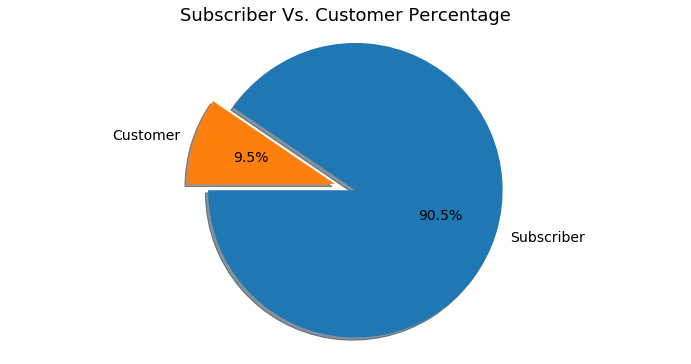

In [5]:
# Check the Percentage of bike riders type betweet (Subscriber & Customer)
plt.figure(figsize=[12,6])
bike_user = gobike.user_type.value_counts()
labels = ['Subscriber', 'Customer']
explode = (0, 0.16)
plt.pie(bike_user, radius=1.1, labels=labels,explode=explode, startangle=180, autopct='%0.1f%%', textprops = {'fontsize': 14}, shadow=True)
plt.title('Subscriber Vs. Customer Percentage', size=18)
plt.axis('equal');

### 4-Which of user type has the long trip duration?

As we see clearly, the Customer bike user spend more time than Subscriber user.

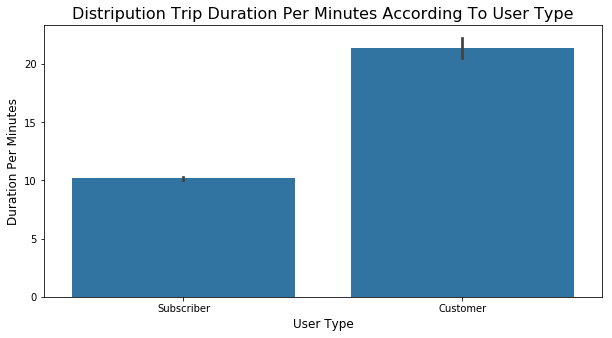

In [6]:
# Checking the distripution trip duration per minutes according to user type
plt.figure(figsize=[10,5])
bike_type = gobike.user_type.value_counts().index
sb.barplot(y='duration_min', x='user_type', data=gobike,color=color,order=bike_type)
plt.xlabel('User Type',size=12)
plt.title('Distripution Trip Duration Per Minutes According To User Type', size= 16)
plt.ylabel('Duration Per Minutes', size=12);

### 5-Which gender has the longest trips duration during the weekdays?

The Other gender in general tend to have much longer trips, especially on the weekend (Sat & Sun) and the second is Female.


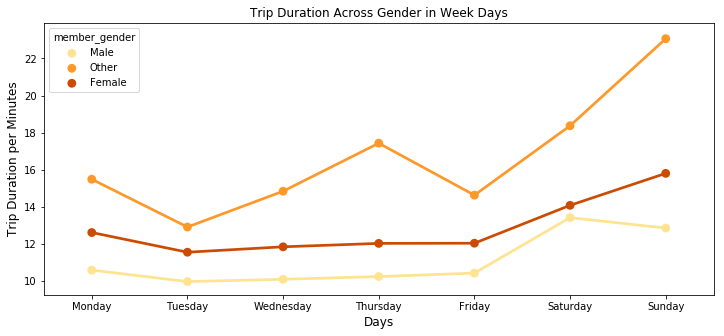

In [7]:
# Review the relation between Gender and Duration per minutes during the Weekdays
plt.figure(figsize=[12,5])
sb.pointplot(data=gobike, x='trip_day', y='duration_min', hue='member_gender', palette='YlOrBr', ci=None, order=sort_days)
plt.xlabel('Days', size=12)
plt.ylabel('Trip Duration per Minutes', size=12)
plt.title('Trip Duration Across Gender in Week Days', size=12);

### 6-Which is the user type that has the longest duration of trips during the weekdays?

As we see, The Customer user type tend to have much longer trips, especially on the weekend (Sat & Sun).

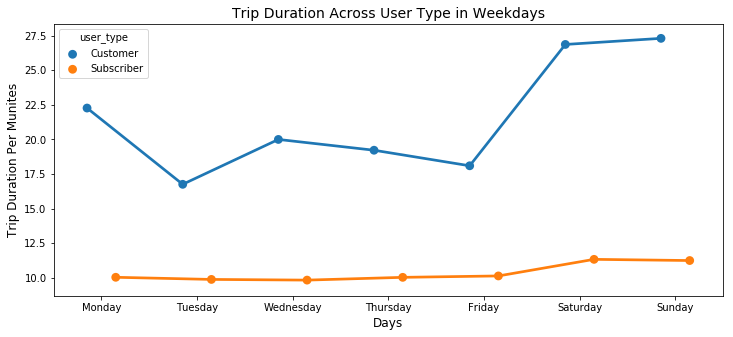

In [8]:
# Review The Trip Duration in Weekdays between Subscriber and Customer
plt.figure(figsize=[12,5])
sb.pointplot(data=gobike, x='trip_day', y='duration_min', hue='user_type', dodge=0.3, order=sort_days, ci=None)
plt
plt.xlabel('Days', size=12)
plt.ylabel('Trip Duration Per Munites', size=12)
plt.title('Trip Duration Across User Type in Weekdays', size=14);

### 7-What are the highest and lowest average trip duration for each user type and gender?

The Other gender (Customer user type) has the highest average (26,286)mins and the lowest for Male gender (Subscriber user type) with (9.776)mins.

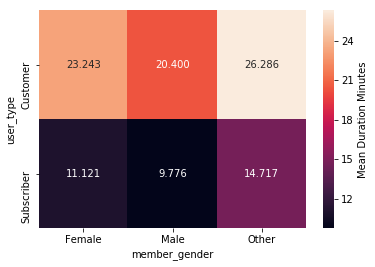

In [9]:
# Review the heatmap to display the average duration trips for each user type and gender
means = gobike.groupby(['user_type', 'member_gender']).mean()['duration_min']
means = means.reset_index(name='bike_id')
means = means.pivot(index='user_type', columns='member_gender', values='bike_id')
sb.heatmap(means,annot=True,fmt='.3f',cbar_kws={'label':'Mean Duration Minutes'});

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 463591 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 